 # <h2><center><strong style="color:#ff6161"> Assignment 2: Detecting Linux system hacking activities Part B
 </center></strong></h3>
 

<h2> 2. Consuming the data 

<h3> 2.2 Memory Event Consumer

In [1]:
# importing libraries 
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook



In [2]:
#Setting the topic name for consumption
topic = 'mem_pop_x4'

#Function to set the Kafka Consumer with the topic and create an instance
def connect_kafka_consumer():
    _consumer = None
    try:
        _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=20000, # stops iteration if no message after 20 sec
                                   auto_offset_reset='latest', # consumes latest available message
                                   bootstrap_servers=['localhost:9092'],
                                   #value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer



In [3]:
#Defining the plot characteristics 
def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))

In [4]:
#Initializing the lists for the loop count calculations
x, y_4, y_5, y_6, y_7, y_8 = [], [], [], [], [], []

In [5]:
#Function to create the consume messages 
def consume_messages(consumer,fig,ax):
 #   while True: 
        try:
            print('Waiting for messages')
            #Looping through the records in consumer
            for message in consumer:
                #Looping through the value field for message within the records
                for m in eval(message.value.decode('utf-8')):
                    #Loop to match the machine and the append the count of records for each machine in the record
                    #print("machineeee", m[0]['machine'])
                    if (m[0]['machine']) == 4:
                        y_4.append(len(m))
                    elif (m[0]['machine']) == 5:
                        y_5.append(len(m))
                    elif (m[0]['machine']) == 6:
                        y_6.append(len(m))
                    elif (m[0]['machine']) == 7:
                        y_7.append(len(m))
                    elif (m[0]['machine']) == 8:
                        y_8.append(len(m))
                        
                #Append the timestamp to the x after one complete cycle
                x.append(dt.datetime.utcnow().strftime("%X"))
                
                #print(x,y_4,y_5,y_6,y_7,y_8)
                #print(len(x) > (120/10))
                
                #Checking for the 2 minute interval window (2-minute window/)
                if len(x) > (120/10):
                    #print("here")
                    ax.clear()
                    #Plotting each machine for the different timestamps 
                    ax.plot(x, y_4)
                    ax.plot(x, y_5)
                    ax.plot(x, y_6)
                    ax.plot(x, y_7)
                    ax.plot(x, y_8)
                    plt.xticks(rotation=45)
                    ax.set_xlabel('Timestamp')
                    ax.set_ylabel('Record Message Count')
                    ax.set_ylim(0,90) 
                    ax.set_yticks([0,20,40,60,80,100])
                    fig.canvas.draw()
                    # removing the item in the first position
                    x.pop(0) 
                    y_4.pop(0)
                    y_5.pop(0)
                    y_6.pop(0)
                    y_7.pop(0)
                    y_8.pop(0)
                    
            plt.close('all')
        except Exception as ex:
            print(str(ex))

<IPython.core.display.Javascript object>


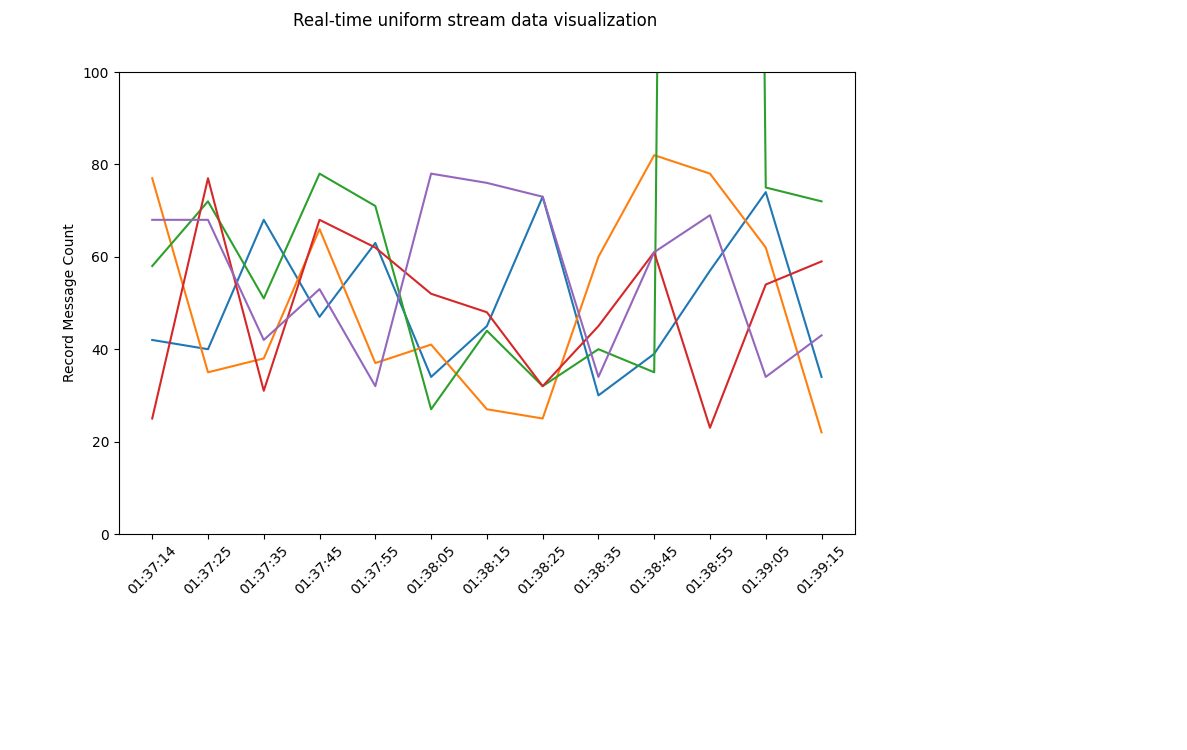

Waiting for messages


KeyboardInterrupt: 

In [6]:
#Calling the consumer from main 
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)        
